# AFRICAN FOOD PRODUCTION EXPLORATORY DATA ANALYSIS 

In [1]:
#To import the modules
import pandas as pd
import numpy as np

In [2]:
#To access the FOOD PRODUCTION dataset and decode it
food_data=pd.read_csv('food production.csv')

In [3]:
#To view the header of each column
food_data.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [4]:
#To check the distribution of the dataset
food_data.describe(include='all')

,Country,Item,Year,Value
count,23110,23110,23110.000000,23110.000000
unique,45,94,NaN,NaN
top,United Republic of Tanzania,Milk - Excluding Butter,NaN,NaN
freq,790,450,NaN,NaN
mean,NaN,NaN,2008.498269,327.785201
std,NaN,NaN,2.871740,1607.940343
min,NaN,NaN,2004.000000,0.000000
25%,NaN,NaN,2006.000000,3.000000
50%,NaN,NaN,2008.000000,18.000000
75%,NaN,NaN,2011.000000,108.000000


In [5]:
print(food_data) #To print the dataset

        Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]


In [6]:
#To convert the Year to a DateObject
from datetime import datetime
food_data['Year']=pd.to_datetime(food_data['Year'],format="%Y").dt.date

In [7]:
#To view the conversion of the "Year" Column dtype 
food_data.Year

0        2004-01-01
1        2005-01-01
2        2006-01-01
3        2007-01-01
4        2008-01-01
            ...    
23105    2009-01-01
23106    2010-01-01
23107    2011-01-01
23108    2012-01-01
23109    2013-01-01
Name: Year, Length: 23110, dtype: object

In [8]:
#To extract the Year from the Datetime and creating a new column as "Year_New"
food_data['Year_New'] = pd.DatetimeIndex(food_data['Year']).year

In [9]:
#To view the extracted column "Year_New" dtype 
food_data.Year_New

0        2004
1        2005
2        2006
3        2007
4        2008
         ... 
23105    2009
23106    2010
23107    2011
23108    2012
23109    2013
Name: Year_New, Length: 23110, dtype: int64

In [10]:
#To view the dtype of Value Column
food_data.Value

0        2731
1        2415
2        2688
3        2319
4        1111
         ... 
23105       0
23106       0
23107       0
23108       0
23109       0
Name: Value, Length: 23110, dtype: int64

In [11]:
food_data['Value_New']= food_data['Value'].values.astype(str) # To convert the int64 Value Column to a String in order to carry out the next task
food_data['Value_New'] = food_data['Value'].fillna('').astype(str) + ' kt' #To add units (1000 tons [metric kilotons]) to Value Column, to make them Quantities.

In [12]:
food_data #To view the dataset in order to see the effect of the unit "kt" added to Value in the new Value_New column

,Country,Item,Year,Value,Year_New,Value_New
0,Algeria,Wheat and products,2004-01-01,2731,2004,2731 kt
1,Algeria,Wheat and products,2005-01-01,2415,2005,2415 kt
2,Algeria,Wheat and products,2006-01-01,2688,2006,2688 kt
3,Algeria,Wheat and products,2007-01-01,2319,2007,2319 kt
4,Algeria,Wheat and products,2008-01-01,1111,2008,1111 kt
...,...,...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009-01-01,0,2009,0 kt
23106,Zimbabwe,Crustaceans,2010-01-01,0,2010,0 kt
23107,Zimbabwe,Crustaceans,2011-01-01,0,2011,0 kt
23108,Zimbabwe,Crustaceans,2012-01-01,0,2012,0 kt


In [13]:
#To Group items within the dataset
food_dt=food_data.groupby(["Country", "Year_New", "Item"])["Value_New"].sum()

In [14]:
food_dt # To view the dataset after the groupings

Country   Year_New  Item                 
Algeria   2004      Apples and products       165 kt
                    Bananas                     0 kt
                    Barley and products      1212 kt
                    Beans                       2 kt
                    Beer                      110 kt
                                              ...   
Zimbabwe  2013      Tea (including mate)       19 kt
                    Tomatoes and products      24 kt
                    Vegetables, Other         203 kt
                    Wheat and products         25 kt
                    Wine                        2 kt
Name: Value_New, Length: 23110, dtype: object

In [15]:
#To save the dataset to CSV file to have a full view
food_dt.to_csv('food_dataGitems.csv')

In [16]:
food_dt2=food_data.groupby(['Country','Year_New'])["Value"].sum() #To Group items within the dataset in order to total the values of the Items

In [17]:
#To save the dataset to CSV file to have a full view
food_dt2.to_csv('food_dataGyear.csv')

In [18]:
food_dt2 # To view the ItemValue Totalled dataset 

Country   Year_New
Algeria   2004        15536
          2005        15667
          2006        16417
          2007        14763
          2008        13841
                      ...  
Zimbabwe  2009         5754
          2010         6777
          2011         7551
          2012         8173
          2013         7914
Name: Value, Length: 450, dtype: int64

In [19]:
fd=pd.read_csv('food_dataGyear.csv') #To save the dataset to CSV file to have a full view

"fd" : REPRESENT THE FINAL FOOD PRODUCTION DATASET

In [20]:
fd # To view the dataset 

,Country,Year_New,Value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841
...,...,...,...
445,Zimbabwe,2009,5754
446,Zimbabwe,2010,6777
447,Zimbabwe,2011,7551
448,Zimbabwe,2012,8173


<AxesSubplot:xlabel='Year', ylabel='Value_kilotons_kt'>

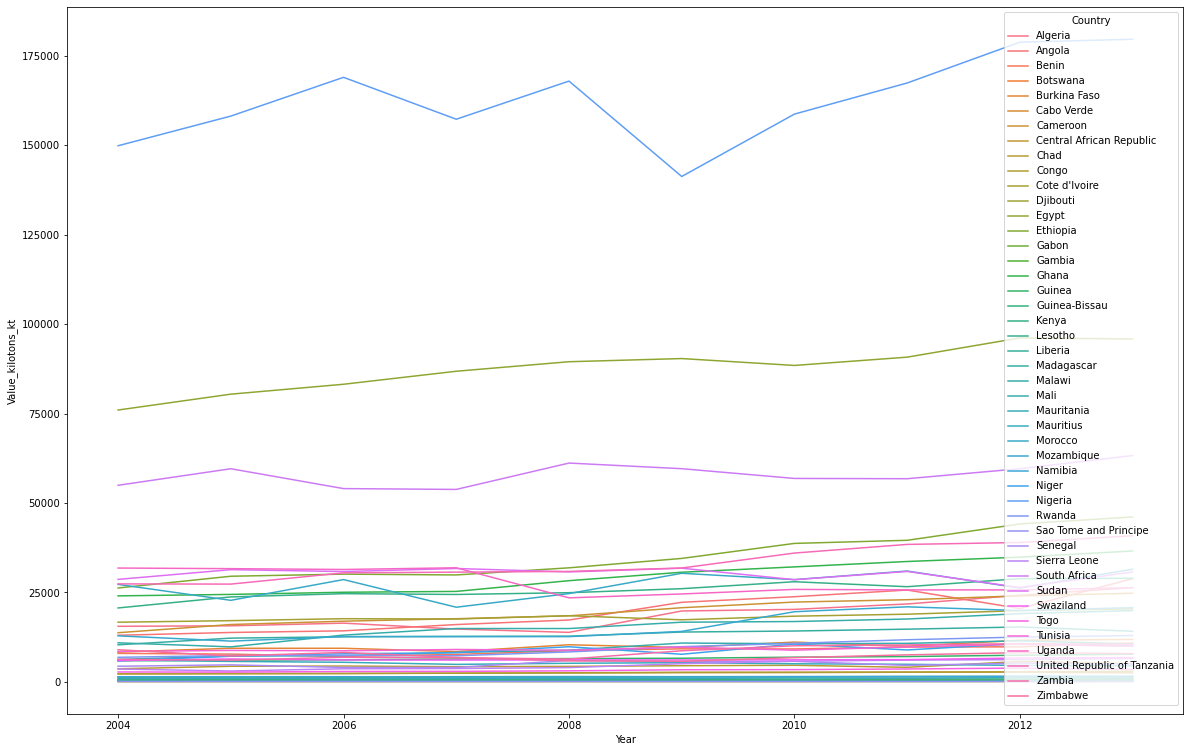

In [21]:
#To visualize the result of the groupings by plotting on a line graph the country values against year for FOOD PRODUCTION
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,13))
plt.xlabel('Year')
plt.ylabel('Value_kilotons_kt')
sns.lineplot(data=fd,x="Year_New",y="Value",hue="Country")

The plot shows the trend in food production between 2004 and 2013 for the included African Countries. It is also observed that Nigeria, Egypt and South Africa have consistently, respectively been the top THREE FOOD PRODUCING COUNTRIES IN AFRICA

# AFRICAN FOOD CONSUMPTION EXPLORATORY DATA ANALYSIS

Food Consumption in 45 African Countries between 2004 and 2013

In [22]:
#To import the FOOD CONSUMPTION dataset
food_con=pd.read_csv('food consumption.csv')

In [23]:
food_con.head() #To view the Food consump. Dataframe

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [24]:
#To convert the Year to a DateObject
from datetime import datetime
food_con['Year']=pd.to_datetime(food_con['Year'],format="%Y").dt.date

In [25]:
#To view the conversion of the "Year" Column dtype 
food_con.Year

0      2004-01-01
1      2005-01-01
2      2006-01-01
3      2007-01-01
4      2008-01-01
          ...    
445    2009-01-01
446    2010-01-01
447    2011-01-01
448    2012-01-01
449    2013-01-01
Name: Year, Length: 450, dtype: object

In [26]:
#To extract the Year from the Datetime and creating a new column as "Year_New"
food_con['Year_New'] = pd.DatetimeIndex(food_con['Year']).year

In [27]:
food_con['Value_New']= food_con['Value'].values.astype(str) # To convert the int64 Value Column to a String in order to carry out the next task
food_con['Value_New'] = food_con['Value'].fillna('').astype(str) + ' kcal/person/day' #To add units (1000 tons [metric kilotons]) to Value Column, to make them Quantities.

In [28]:
food_con #To view the dataframe with the additional Column "Value_New" and the added unit "kcal/person/day"

,Country,Year,Value,Year_New,Value_New
0,Algeria,2004-01-01,2987,2004,2987 kcal/person/day
1,Algeria,2005-01-01,2958,2005,2958 kcal/person/day
2,Algeria,2006-01-01,3047,2006,3047 kcal/person/day
3,Algeria,2007-01-01,3041,2007,3041 kcal/person/day
4,Algeria,2008-01-01,3048,2008,3048 kcal/person/day
...,...,...,...,...,...
445,Zimbabwe,2009-01-01,2147,2009,2147 kcal/person/day
446,Zimbabwe,2010-01-01,2168,2010,2168 kcal/person/day
447,Zimbabwe,2011-01-01,2200,2011,2200 kcal/person/day
448,Zimbabwe,2012-01-01,2197,2012,2197 kcal/person/day


In [29]:
#To Group items within the dataset
food_cos=food_con.groupby(["Country", "Year_New"])["Value_New"].sum()

In [30]:
food_cos #To view the grouped food consumption

Country   Year_New
Algeria   2004        2987 kcal/person/day
          2005        2958 kcal/person/day
          2006        3047 kcal/person/day
          2007        3041 kcal/person/day
          2008        3048 kcal/person/day
                              ...         
Zimbabwe  2009        2147 kcal/person/day
          2010        2168 kcal/person/day
          2011        2200 kcal/person/day
          2012        2197 kcal/person/day
          2013        2110 kcal/person/day
Name: Value_New, Length: 450, dtype: object

In [31]:
#To save the dataset to CSV file to have a full view
food_cos.to_csv('food_ConsYear.csv')

In [32]:
#To Group items within the dataset
food_cos2=food_con.groupby(["Country", "Year_New"])["Value"].sum()

In [33]:
#To save the dataset to CSV file to have a full view
food_cos2.to_csv('food_ConsYear2.csv')

In [34]:
food_cons=pd.read_csv('food_ConsYear2.csv') #To import the grouped food consump. dataset

"food_cons" : REPRESENT THE FINAL FOOD CONSUMPTION DATASET

In [35]:
food_cons #To view it

,Country,Year_New,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


<AxesSubplot:xlabel='Year', ylabel='Value_kcal/person/day'>

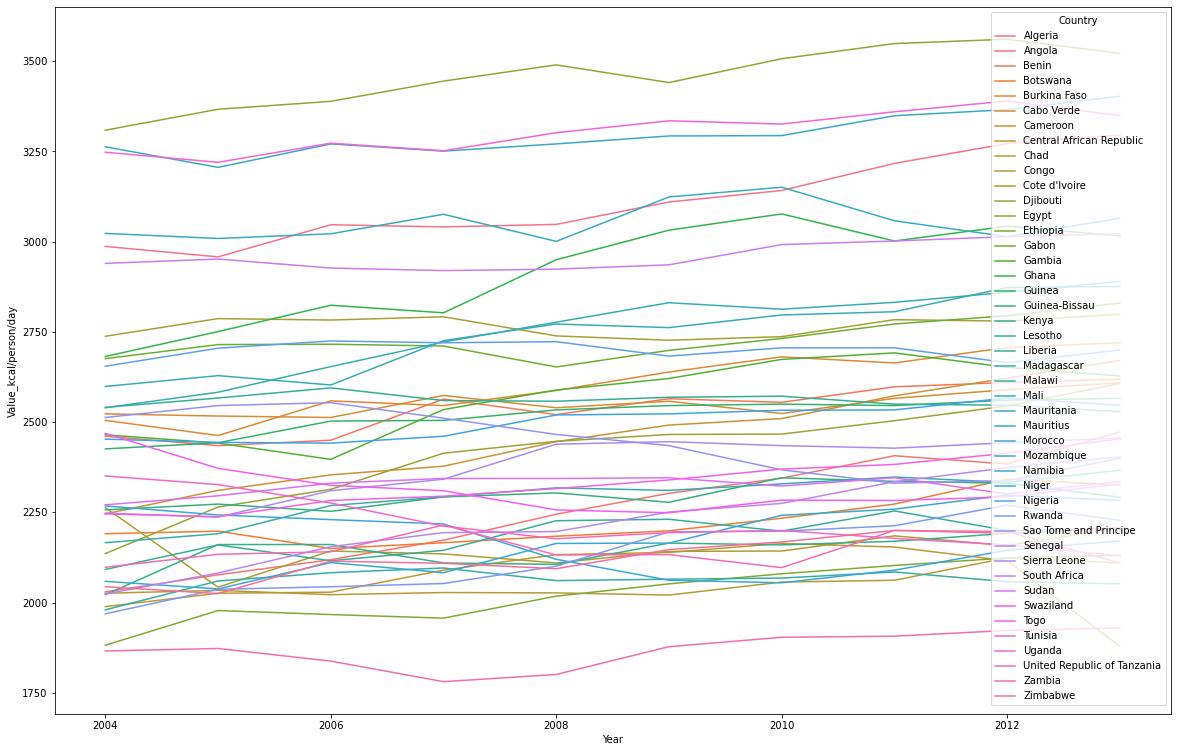

In [36]:
#To visualize the result of the groupings by plotting on a line graph the country values against year for FOOD CONSUMPTION
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,13))
plt.xlabel('Year')
plt.ylabel('Value_kcal/person/day')
sns.lineplot(data=food_cons,x="Year_New",y="Value",hue="Country")

It is seen from the plot that Egypt, Morocco and Tunisia had the highest FOOD SUPPLY PER CAPITA

# BOX WHISKER CHART (BOXPLOT) TO VIEW OUTLIERS

<AxesSubplot:xlabel='Value', ylabel='Country'>

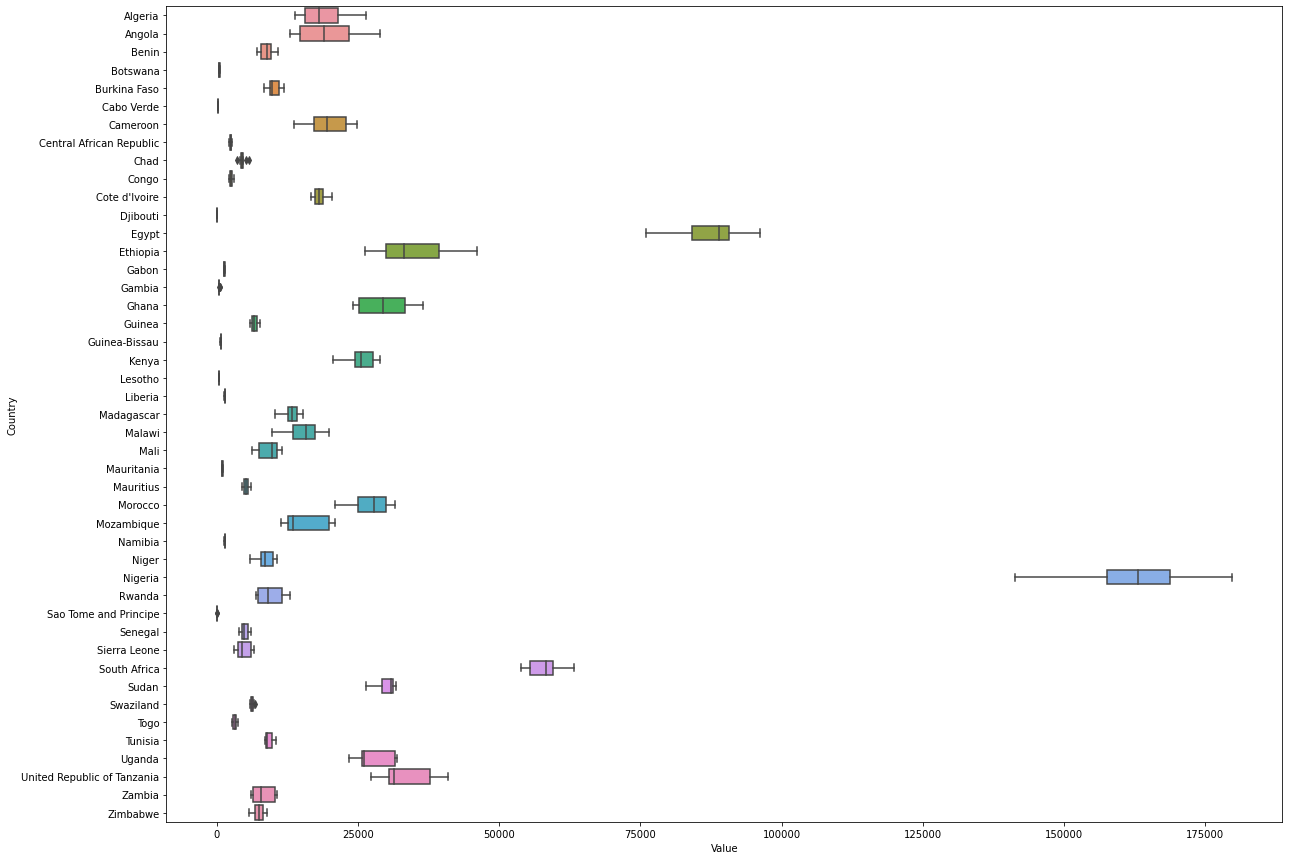

In [37]:
#To plot the Box Whisker Chart for FOOD PRODUCTION of Country against Value
plt.figure(figsize=(20,15))
sns.boxplot(x="Value",y="Country", data=fd)

<AxesSubplot:xlabel='Year_New', ylabel='Value'>

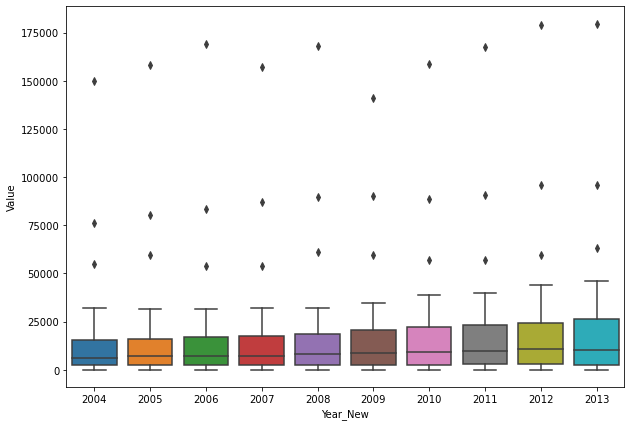

In [38]:
#To plot the Box Whisker Chart for FOOD PRODUCTION of Value against Year
plt.figure(figsize=(10,7))
sns.boxplot(x="Year_New",y="Value", data=fd)

<AxesSubplot:xlabel='Value', ylabel='Country'>

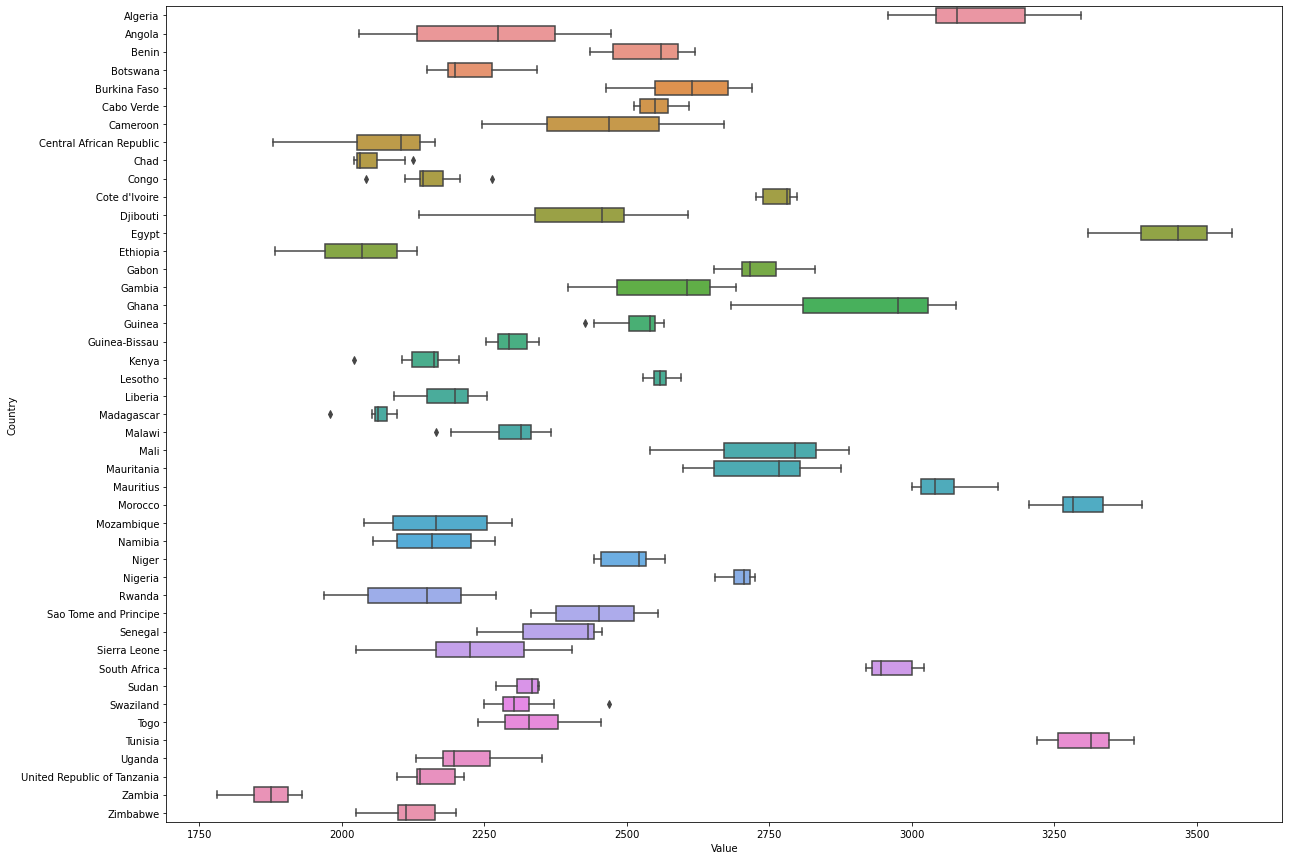

In [39]:
#To plot the Box Whisker Chart for FOOD CONSUMPTION of Country against Value
plt.figure(figsize=(20,15))
sns.boxplot(x="Value",y="Country", data=food_cons)

<AxesSubplot:xlabel='Year_New', ylabel='Value'>

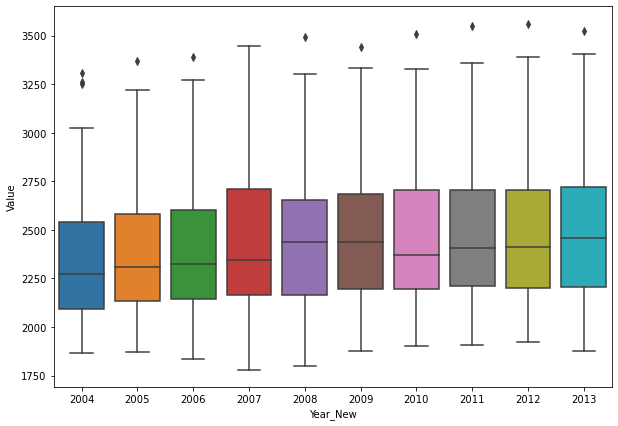

In [40]:
#To plot the Box Whisker Chart for FOOD PRODUCTION of Value against Year
plt.figure(figsize=(10,7))
sns.boxplot(x="Year_New",y="Value", data=food_cons)

# TO REMOVE ALL OUTLIERS 

BOXPLOT TO VIEW OUTLIERS IN THE FOOD PRODUCTION VALUES

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

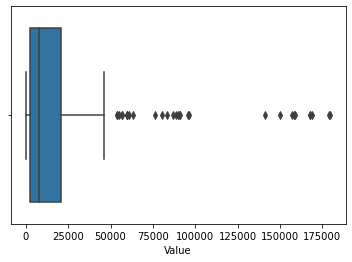

In [41]:
sns.boxplot(fd['Value']) #To show the outliers in the Values of Food Production

In [42]:
fd['Value'].describe()#To view the distribution of the food production dataset

count       450.000000
mean      16833.591111
std       27707.501219
min          55.000000
25%        2299.250000
50%        7884.500000
75%       20712.750000
max      179631.000000
Name: Value, dtype: float64

BOXPLOT TO VIEW OUTLIERS IN THE FOOD CONSUMPTION VALUES

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

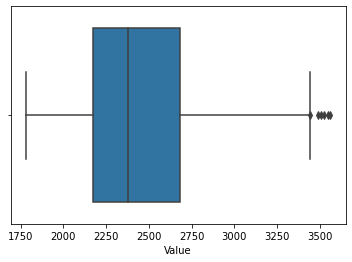

In [43]:
sns.boxplot(food_cons['Value'])#To show the outliers in the Values of Food Consumption

In [44]:
food_cons['Value'].describe() #To view the distribution of the food consumption dataset

count     450.000000
mean     2469.775556
std       379.140143
min      1781.000000
25%      2174.000000
50%      2376.000000
75%      2681.750000
max      3561.000000
Name: Value, dtype: float64

# STATISTICAL MEASURES AND APPLICATIONS AND OUTLIERS REMOVAL


* Interquartile Range (IQR)=Q3-Q1
* Lower Fence=Q1-1.5(IQR)
* Upper Fence=Q3+1.5(IQR)

TO REMOVE OUTLIERS IN THE FOOD PRODUCTION VALUES

In [45]:
#the statistical analysis for the quartiles calculation
Q1=np.percentile(fd['Value'],25,interpolation='midpoint')
Q3=np.percentile(fd['Value'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Old Shape: ", fd.shape)#To display the shape of the dataframe

Old Shape:  (450, 3)


In [46]:
#Upper fence
upper=np.where(fd['Value']>=(Q3+1.5*IQR))
#Lower Fence
lower=np.where(fd['Value']<=(Q1-1.5*IQR))
#Removing the Outliers
fd.drop(upper[0],inplace=True)
fd.drop(lower[0], inplace=True)
print("New Shape: ", fd.shape)

New Shape:  (420, 3)


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

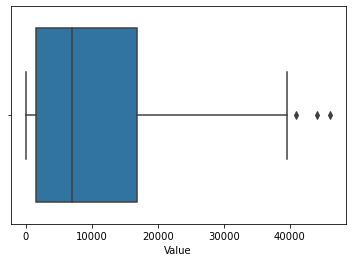

In [47]:
sns.boxplot(fd['Value'])#To show the outliers in the Values of Food Production after the Removal

It is observed that considerably the outliers was removed for the food production as the min and max values are not so far apart before the statistical measures was applied

In [48]:
fd['Value'].describe()#To view the distribution of the food production dataset

count      420.000000
mean     10690.466667
std      10567.373138
min         55.000000
25%       1513.500000
50%       7097.000000
75%      16890.750000
max      46102.000000
Name: Value, dtype: float64

TO REMOVE THE OUTLIERS IN THE FOOD CONSUMPTION VALUES

In [49]:
#the statistical analysis for the quartiles calculation
Q1=np.percentile(food_cons['Value'],25,interpolation='midpoint')
Q3=np.percentile(food_cons['Value'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Old Shape: ", food_cons.shape) #To display the shape of the dataframe

Old Shape:  (450, 3)


In [50]:
#Upper fence
upper=np.where(food_cons['Value']>=(Q3+1.5*IQR))
#Lower Fence
lower=np.where(food_cons['Value']<=(Q1-1.5*IQR))
#Removing the Outliers
food_cons.drop(upper[0],inplace=True)
food_cons.drop(lower[0], inplace=True)
print("New Shape: ", food_cons.shape)

New Shape:  (444, 3)


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value'>

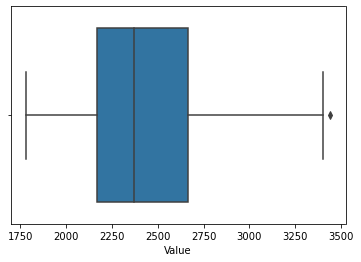

In [51]:
sns.boxplot(food_cons['Value'])#To show the outliers in the Values of Food Consumption after the Removal

It is observed that considerably the outliers was removed for the food consumption as the min and max values are not so far apart before the statistical measures was applied

In [52]:
food_cons['Value'].describe() #To view the distribution of the food consumption dataset

count     444.000000
mean     2455.686937
std       361.599024
min      1781.000000
25%      2170.750000
50%      2369.000000
75%      2666.500000
max      3441.000000
Name: Value, dtype: float64

# THE NEW DATASET WITH 38 COUNTRIES, POPULATION AND GROUPBY RICE ITEM

The following countries were dropped and Rice (Milled Equivalent)(renamed as Rice) was extracted with another application and saved as "fddr.csv" which was imported to python:
* Botswana
* Cape Verde wrongly typed as "Cabo Verde" in the dataset
* Djibouti
* Lesotho
* Namibia
* Sao Tome & Pricipe wrongly typed as "Sao Tome and Principe" in the dataset
* Tunisia

So, Out of 45 Countries, 7 Countries were dropped remaining 38 Countries. The population was also added as gotten from United Nations World Population Dataset

In [53]:
#To import the New Dataset with 38 Countries and Grouped by the Item "Rice"
fdr=pd.read_csv('fddr.csv')

In [54]:
fdr['Value_New']= fdr['Value'].values.astype(str) # To convert the int64 Value Column to a String in order to carry out the next task
fdr['Value_New'] = fdr['Value'].fillna('').astype(str) + ' kt' #To add units (1000 tons [metric kilotons]) to Value Column, to make them Quantities.

In [55]:
fdr #To view

,Country,Year_New,Item,Value,Population,Value_New
0,Algeria,2004,Rice,0,32692153,0 kt
1,Algeria,2005,Rice,0,33149720,0 kt
2,Algeria,2006,Rice,0,33641007,0 kt
3,Algeria,2007,Rice,0,34166976,0 kt
4,Algeria,2008,Rice,0,34730604,0 kt
...,...,...,...,...,...,...
375,Zimbabwe,2009,Rice,0,12526964,0 kt
376,Zimbabwe,2010,Rice,0,12697728,0 kt
377,Zimbabwe,2011,Rice,0,12894323,0 kt
378,Zimbabwe,2012,Rice,0,13115149,0 kt


In [56]:
#To Group items within the dataset
fdr.groupby(["Country", "Year_New"])["Value"].sum()

Country   Year_New
Algeria   2004        0
          2005        0
          2006        0
          2007        0
          2008        0
                     ..
Zimbabwe  2009        0
          2010        0
          2011        0
          2012        0
          2013        0
Name: Value, Length: 380, dtype: int64

# PEARSON CORRELATION TEST

In [57]:
#Importing all necessary modules needed for the pearson correlation test
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sns

import scipy.stats as st


In [58]:
#Setting the plot 
%matplotlib inline
rcParams['figure.figsize']=5, 4
sns.set_style('whitegrid')

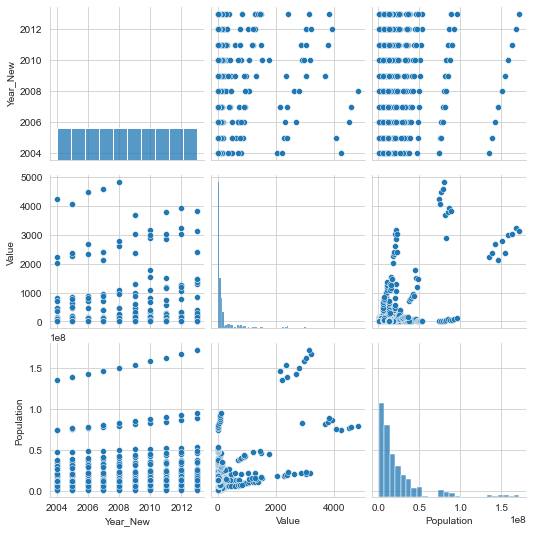

In [59]:
sns.pairplot(fdr) #A plot to properly visualize the correlations

In [60]:
fdr['Value'].dtype # To ascertain the dtype of the Value column

dtype('int64')

In [61]:
fdr['Population'].dtype # To ascertain the dtype of the Population column

dtype('int64')

In [62]:
np.corrcoef(fdr['Value'],fdr['Population']) #To calculate the correlation coefficient between Value and Population

array([[1.        , 0.57369199],
       [0.57369199, 1.        ]])

In [63]:
st.pearsonr(fdr['Value'],fdr['Population']) #The Pearson correlation

(0.5736919881988254, 1.2232041630913223e-34)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Value', ylabel='Population'>

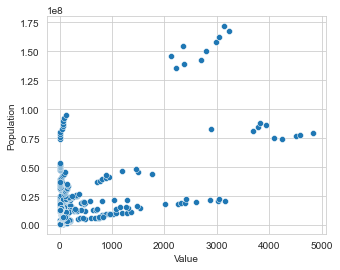

In [64]:
sns.scatterplot(fdr['Value'],fdr['Population']) #To Visualize

In [65]:
fdr.corr() #To view the correlation between the columns in the dataframe

,Year_New,Value,Population
Year_New,1.000000,0.060456,0.057687
Value,0.060456,1.000000,0.573692
Population,0.057687,0.573692,1.000000


<AxesSubplot:>

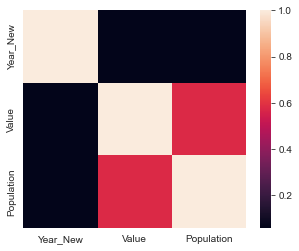

In [66]:
sns.heatmap(fdr.corr()) #To Visualize

# MEAN (AVERAGE) OF THE NEW DATASET

In [67]:
fdr2 = fdr.mean() #To calculate the mean across the index
print(fdr2)

Year_New      2.008500e+03
Value         4.125658e+02
Population    2.323486e+07
dtype: float64


C:\Users\User\AppData\Local\Temp/ipykernel_4436/1231367323.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fdr2 = fdr.mean() #To calculate the mean


In [74]:
fdr.mean(axis='columns') #To calculate the mean across the column

C:\Users\User\AppData\Local\Temp/ipykernel_4436/3348933194.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fdr.mean(axis='columns') #To calculate the mean across the column


0      1.089805e+07
1      1.105058e+07
2      1.121434e+07
3      1.138966e+07
4      1.157754e+07
           ...     
375    4.176324e+06
376    4.233246e+06
377    4.298778e+06
378    4.372387e+06
379    4.450797e+06
Length: 380, dtype: float64

In [82]:
f1=fdr['Population'].mean() #Average of the Population in 38 African Countries
f1

23234856.365789473

In [83]:
f2=fdr['Value'].mean() #Average of the Value of Rice in Food Production
f2

412.5657894736842

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'bool' object has no attribute 'all'

# BAR CHART PLOT FOR THE VARIOUS DATAFRAME

PLOT FOR THE NEW DATASET (38 COUNTRIES) SHOWING THE YEAR AGAINST VALUE FOR RICE

<AxesSubplot:xlabel='Year_New', ylabel='Value'>

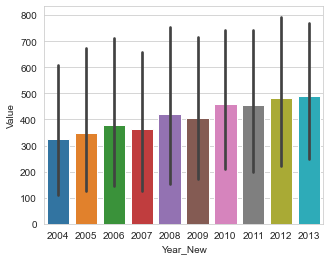

In [68]:
sns.barplot(x='Year_New', y='Value',data=fdr)

PLOT FOR THE NEW DATASET (38 COUNTRIES) SHOWING THE YEAR AGAINST POPULATION GROWTH

<AxesSubplot:xlabel='Year_New', ylabel='Population'>

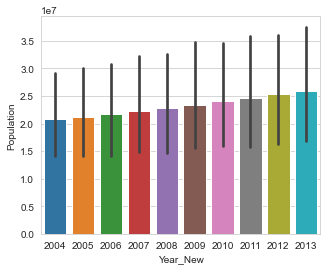

In [69]:
sns.barplot(x='Year_New', y='Population',data=fdr)

PLOT FOR THE FOOD PRODUCTION SHOWING THE YEAR AGAINST VALUE FOR ITEMS

<AxesSubplot:xlabel='Year_New', ylabel='Value'>

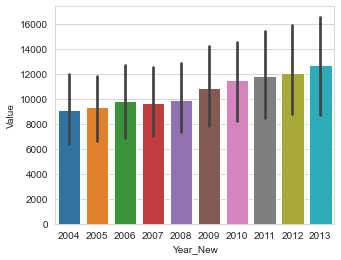

In [70]:
sns.barplot(x='Year_New', y='Value',data=fd)

PLOT FOR THE FOOD CONSUMPTION SHOWING THE YEAR AGAINST VALUE FOR ITEMS

<AxesSubplot:xlabel='Year_New', ylabel='Value'>

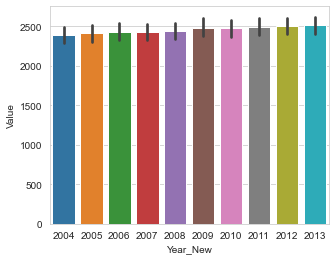

In [71]:
sns.barplot(x='Year_New', y='Value',data=food_cons)

# MAPS FOR THE FOOD PRODUCTION AND CONSUMPTION IN THE AFRICAN COUNTRIES